# BIGMART_SALES DATASET
### Here in this notebook,we will be working on our bigmart sales dataset and we will try and perform feature transformation on the continuos features in our dataset

![](download.png)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
df=pd.read_csv('train_bm.csv')

In [4]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

*Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. If the curve is shifted to the left or to the right, it is said to be skewed.*

## Item_Visibility Visualisation

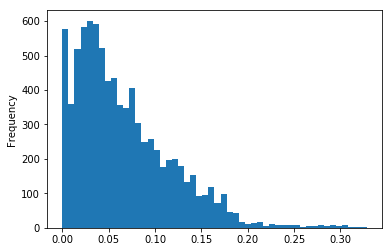

In [6]:
df['Item_Visibility'].plot.hist(bins=50)

*Right skewed data in Item_Visibility.Here we can apply the sqroot or cuberoot to the data or take log to get a normal distribution of the data*


In [7]:
Item_Visibility_sqroot=np.sqrt(df['Item_Visibility'])


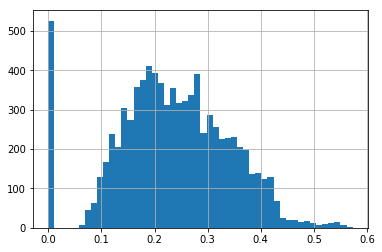

In [8]:
Item_Visibility_sqroot.hist(bins=50)

*After using the sqroot function to the "Item_Visibility"feature,we can see that we got normal distribution of data*

In [9]:
Item_Visibility_log=np.log(df['Item_Visibility'])


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


*The warning we get here says "Divide by 0 encountered".We have a value of 0 and log(0)is not defined.
Lets try to add 0.1 to every value and then take log*

In [10]:
Item_Visibility_log=np.log(df['Item_Visibility']+0.1)

*As we get no warning we can proceed with out plotting of the distribution*

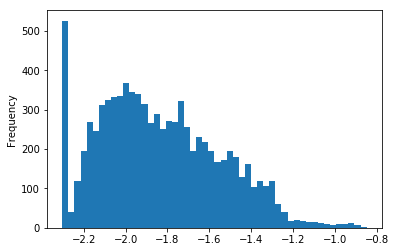

In [11]:
Item_Visibility_log.plot.hist(bins=50)

*Here the values that we get are all negative because the values in column are all less than 1.Lets increase the scale of the feature and see*

**NOTE-Increasing the scale will not affect the distribution in any way**

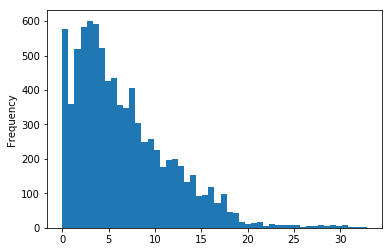

In [12]:
Visibility=df['Item_Visibility']*100
Visibility.plot.hist(bins=50)

*Now lets take the log of the values*

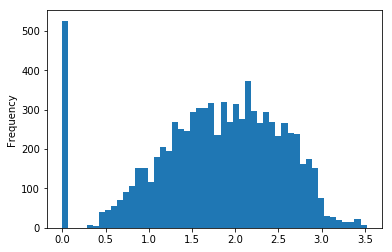

In [13]:
Log_V=np.log(Visibility+1)
Log_V.plot.hist(bins=50)


*Here we can see that the distribution is somewhat normal and the values are positive too*

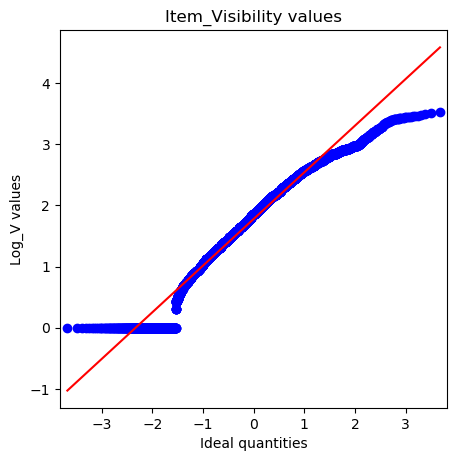

In [14]:
from statsmodels.graphics.gofplots import qqplot

fig,ax=plt.subplots(figsize=(5,5),dpi=100)
qqplot(Log_V,line='s',ax=ax)
plt.xlabel('Ideal quantities')
plt.ylabel('Log_V values')
plt.title('Item_Visibility values')
plt.show()



*The qq plot also summarises that the values follow somewhat normal distribution*

## Item_Weight Visualisation

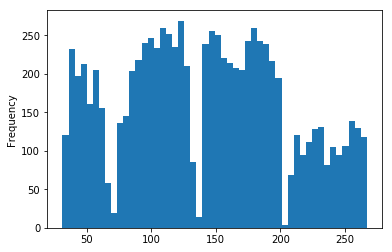

In [15]:
df['Item_MRP'].plot.hist(bins=50)

*Nothing can be inferred from the graph.Lets try a different method to find skewness*

In [16]:
from scipy.stats import skew

**Skewness =3(Mean- Median)/Standard Deviation**
*Skewness has 3 types*
1. Normal Distribution-skewness=0
2. Positive Skewed Distribution-skewness>0
3. Negative Skewed Distribution-skewness<0



In [20]:
print('Skewness of Item_MRP',skew(df['Item_MRP']))


Skewness of Item_MRP 0.1271798803336854


*Here we can see that our feature is very slightly right skewed*

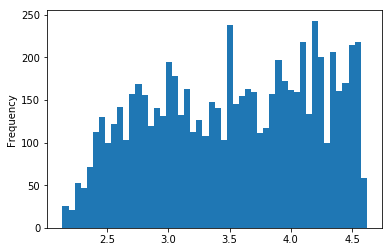

In [18]:
Item_Weight_sqroot=np.sqrt(df['Item_Weight'])
Item_Weight_sqroot.plot.hist(bins=50)

*After applying the sqroot function to our feature,we can see we get normal distribution of our data*

## Item_Weight Visualisation

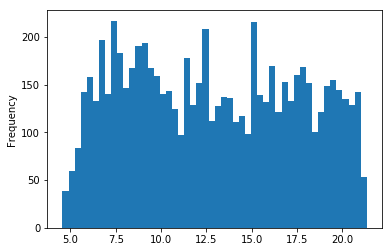

In [21]:
df['Item_Weight'].plot.hist(bins=50)

*As seen before ,nothing can be said about the skewness of our dataset by looking at this plot.So we will use a different mmethod to check the same*

In [22]:
print('Skewness of Item_Weight',skew(df['Item_Weight']))

Skewness of Item_Weight nan


*So we can see that our Item_Weight feature has absolutely no skewness and it is a normal distribution indeed*

*Just to be double sure,lets plot a QQ-plot and put our doubts to rest*

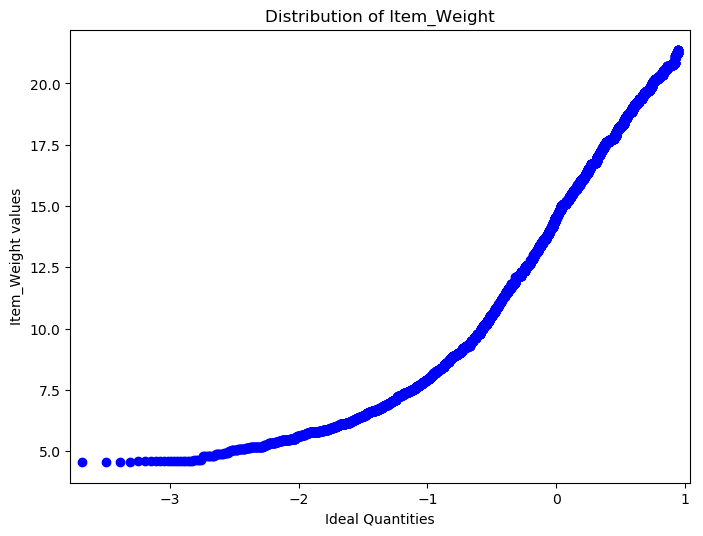

In [25]:
fig,ax=plt.subplots(figsize=(8,6),dpi=100)
qqplot(df['Item_Weight'],line='s',ax=ax)
plt.xlabel('Ideal Quantities')
plt.ylabel('Item_Weight values')
plt.title('Distribution of Item_Weight')
plt.show()

*Hence we can confrim with the QQ-plot too that our data is normally distributed in Item_Weight feature*